In [1]:
# 原项目 Kaggle的Mobile App Store https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/kernels
# 收录于 DataFountain：AppStore移动应用分析 https://www.datafountain.cn/datasets/58
# 博客：啥游戏最赚钱？App store数据集分析 https://www.jianshu.com/p/fb6b3f457d21
# 博客：Mobile APP（Apple IOS app store）特性分析 https://blog.csdn.net/qq_41254399/article/details/81461575?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromBaidu-2&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromBaidu-2

#调用基本包
import pandas as pd

In [2]:
#数据读取
app=pd.read_csv('AppleStore.csv')

In [3]:
#数据的基本信息
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


In [4]:
app.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [5]:
#发现了unname 0这个奇怪的变量，需要进行清理
app.drop('Unnamed: 0',axis=1,inplace=True)
#drop默认是对行
#inplace表示直接替换掉原有数据
#同样可以用位置来举
#app.drop(app.columns[0],axis=1,inplace=True)

In [6]:
#对数据型变量的整体描述
app.describe()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [7]:
# 考虑将sizebytes变成mb，新增数据
app['size_mb'] = app['size_bytes'] / (1024 * 1024.0)

In [8]:
app.size_mb.describe()

count    7197.000000
mean      189.909414
std       342.566408
min         0.562500
25%        44.749023
50%        92.652344
75%       173.497070
max      3839.463867
Name: size_mb, dtype: float64

In [9]:
# 根据价格新增标签
app['paid'] = app['price'].apply(lambda x: 1 if x > 0 else 0)
#lambda阐述规则，X为price，为paid赋值，即当price＞0，paid为1，其他情况下，paid为0

In [10]:
app.paid.describe()

count    7197.000000
mean        0.436432
std         0.495977
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: paid, dtype: float64

In [11]:
# 该部分小结,初步完成数据清洗
#清洗异常值（unamed)
#给分析造成难度的值(size-bytes)
#核心变量的创建（免费/收费)

In [11]:
#value_counts (price,prime_genre)
#value_Coutn只能对应series，不能对整个dataframe做操作
app.price.value_counts()

0.00      4056
0.99       728
2.99       683
1.99       621
4.99       394
3.99       277
6.99       166
9.99        81
5.99        52
7.99        33
14.99       21
19.99       13
8.99         9
24.99        8
13.99        6
11.99        6
29.99        6
12.99        5
15.99        4
59.99        3
17.99        3
22.99        2
23.99        2
20.99        2
27.99        2
16.99        2
49.99        2
39.99        2
74.99        1
18.99        1
34.99        1
99.99        1
299.99       1
47.99        1
21.99        1
249.99       1
Name: price, dtype: int64

In [12]:
#删除价格大于等于49.99的app
app=app[app['price']<=49.99]

In [13]:
#数据的快速分组
bins = [0,2,10,300]
labels = [  '<2', '<10','<300']
app['price_new']=pd.cut(app.price, bins, right=False, labels=labels)

In [15]:
app.groupby(['price_new'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
price_new,,,,,,,,
<2,5405.0,0.361981,0.675318,0.00,0.00,0.00,0.00,1.99
<10,1695.0,4.565811,1.864034,2.99,2.99,3.99,4.99,9.99
<300,90.0,20.256667,8.245939,11.99,14.99,17.99,23.99,49.99


In [16]:
# groupby的操作,不同类别app的价格分布
app.groupby(['prime_genre'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
prime_genre,,,,,,,,
Book,112.0,1.790536,3.342210,0.0,0.0,0.00,2.99,27.99
Business,56.0,4.136429,7.154403,0.0,0.0,2.99,4.99,49.99
Catalogs,10.0,0.799000,2.526660,0.0,0.0,0.00,0.00,7.99
Education,449.0,2.572004,2.669539,0.0,0.0,2.99,2.99,24.99
Entertainment,535.0,0.889701,1.454022,0.0,0.0,0.00,1.99,9.99
Finance,104.0,0.421154,1.108990,0.0,0.0,0.00,0.00,5.99
Food & Drink,63.0,1.552381,3.972119,0.0,0.0,0.00,1.49,27.99
Games,3862.0,1.432923,2.486609,0.0,0.0,0.00,1.99,29.99
Health & Fitness,180.0,1.916444,2.052378,0.0,0.0,1.99,2.99,9.99


In [17]:
app.rating_count_tot.describe()

count    7.190000e+03
mean     1.290515e+04
std      7.577526e+04
min      0.000000e+00
25%      2.725000e+01
50%      3.005000e+02
75%      2.796750e+03
max      2.974676e+06
Name: rating_count_tot, dtype: float64

In [18]:
#对用户打分的分组
bins = [0,1000,5000,100000,5000000]
app['rating_new']=pd.cut(app.rating_count_tot, bins, right=False)

In [19]:
#用户打分和价格的关系
app.groupby(['rating_new'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
rating_new,,,,,,,,
"[0, 1000)",4587.0,1.798696,3.324682,0.0,0.0,0.0,2.99,49.99
"[1000, 5000)",1193.0,1.740721,3.203853,0.0,0.0,0.0,2.99,39.99
"[5000, 100000)",1192.0,0.963549,1.984895,0.0,0.0,0.0,0.99,14.99
"[100000, 5000000)",218.0,0.196376,0.925160,0.0,0.0,0.0,0.00,7.99


In [20]:
#可视化部分
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

c:\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 2160x1440 with 0 Axes>

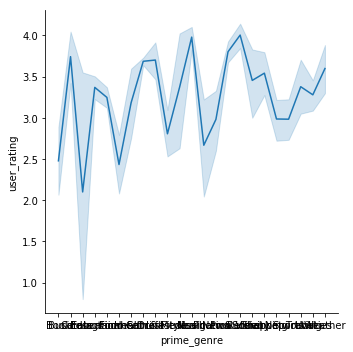

In [21]:
#app评分关系
plt.figure(figsize=(30,20))#调整大小
sns.relplot(x="prime_genre", y="user_rating",kind='line',
              data=app) #折线图

In [22]:
app1=app[app['price']<=9.99]

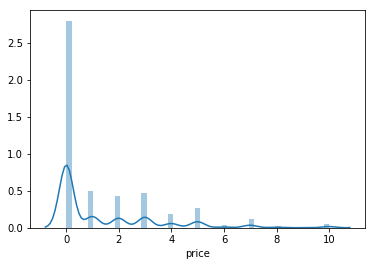

In [23]:
#直方图，APP价格的分布
sns.distplot(app1['price'])

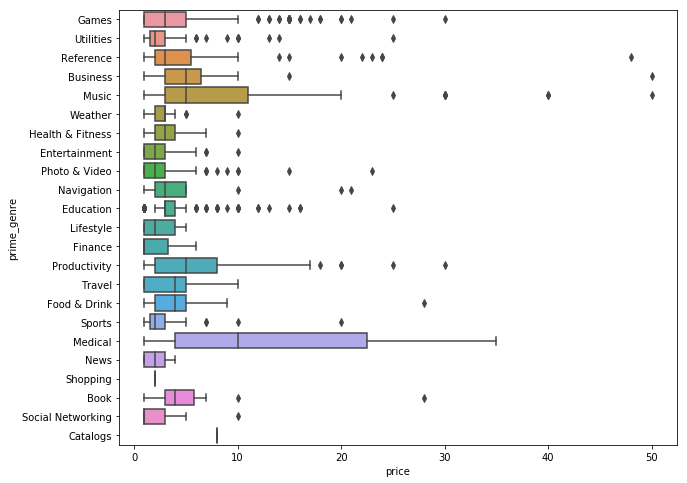

In [24]:
#业务问题2：收费app的价格分布是如何的？不同类别之间有关系吗？

#箱线图，不同类别APP价格
plt.figure(figsize=(10,8))#调整大小
sns.boxplot(x='price',y='prime_genre',data=app[app['paid']==1])

#业务解答：价格绝大部分都集中在9.99美元以内，个别类别（如医疗）等因专业性总体价格会高于其他类别

In [25]:
#只保留五个类别数据
top5= ['Games','Entertainment', 'Education', 'Photo & Video',
       'Utilities']
app5 = app[app.prime_genre.isin(top5)]

c:\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


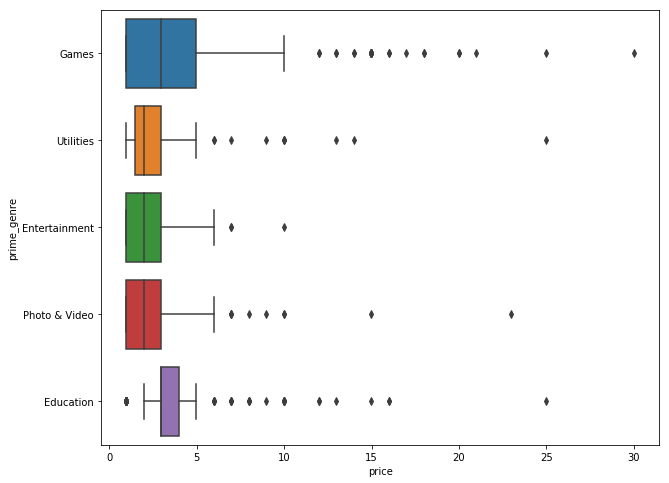

In [26]:
#箱线图，前五个类别的app价格

plt.figure(figsize=(10,8))#调整大小
sns.boxplot(x='price',y='prime_genre',data=app5[app['paid']==1])

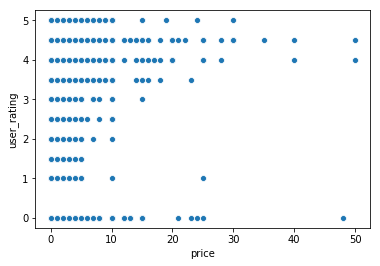

In [27]:
#散点图，价格和用户评分的分布
sns.scatterplot(x='price',y='user_rating',data=app)

In [28]:
#只保留五个类别数据
top5= ['Games','Entertainment', 'Education', 'Photo & Video',
       'Utilities']
app5 = app[app.prime_genre.isin(top5)]

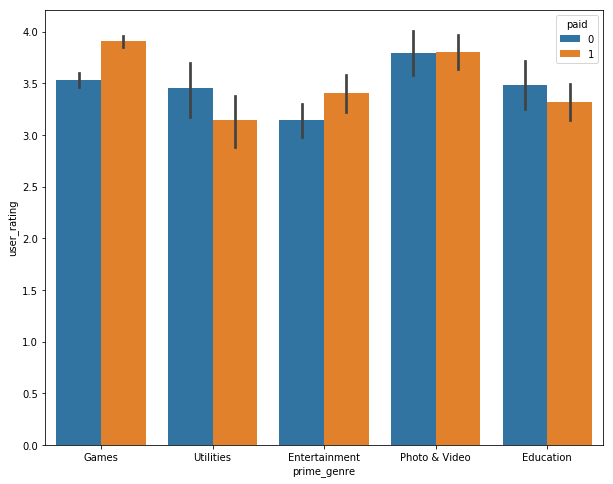

In [29]:
#柱状图，前5个类别app的用户评分均值
#同一类别，将免费和付费的评分进行对比
plt.figure(figsize=(10,8))
sns.barplot(x='prime_genre',y='user_rating',hue='paid',data=app5)

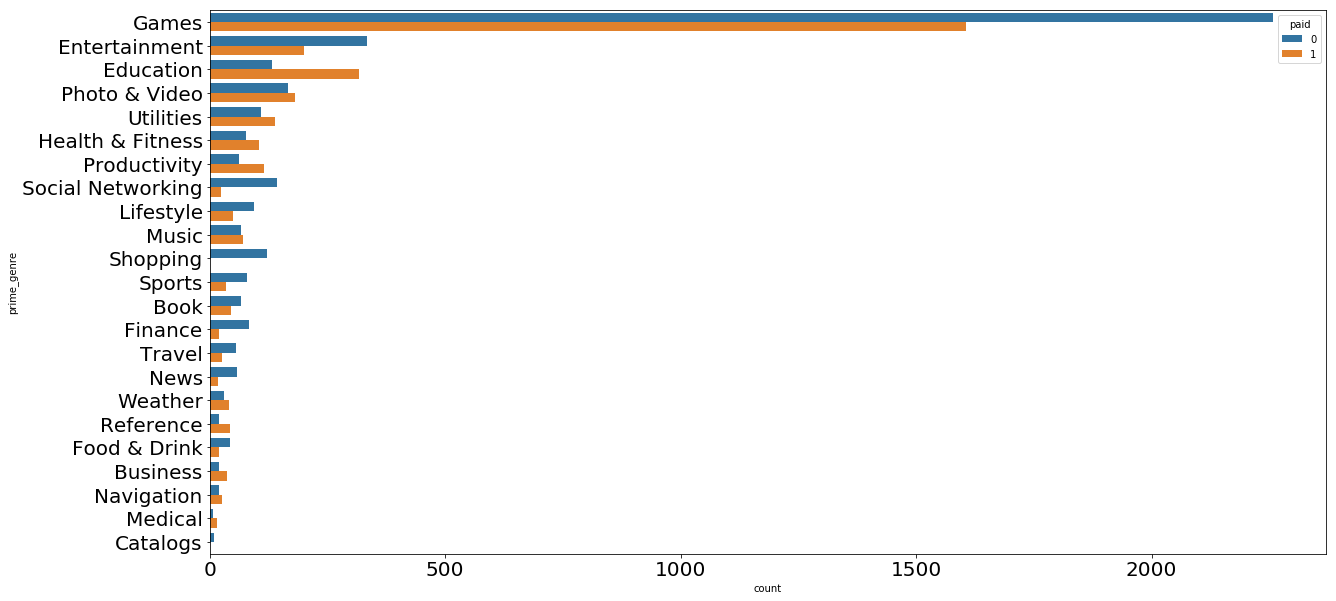

In [30]:
#业务问题1 免费或收费APP集中在哪些类别
#第一步，将数据加总成每个类别有多少个app
#第二步，从高到低进行排列
#第三步，将数据进行可视化

#使用countplot--count是对数据加总，plot将数据进行可视化
#使用order对数据进行排序

plt.figure(figsize=(20,10))
sns.countplot(y='prime_genre',hue='paid',data=app,order=app['prime_genre'].value_counts().index)
plt.tick_params(labelsize=20)

#业务解答：都是高度集中在游戏类别

In [31]:
#免费与收费的APP在不同评分区间的分布
bins=[0,0.1,2.5,4.5,5]
app['rating_level']=pd.cut(app.user_rating,bins,right=False)

In [32]:
app.groupby(['rating_level'])['user_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
rating_level,,,,,,,,
"[0.0, 0.1)",929.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
"[0.1, 2.5)",206.0,1.650485,0.400213,1.0,1.5,2.0,2.0,2.0
"[2.5, 4.5)",2903.0,3.646056,0.467987,2.5,3.5,4.0,4.0,4.0
"[4.5, 5.0)",2660.0,4.500000,0.000000,4.5,4.5,4.5,4.5,4.5


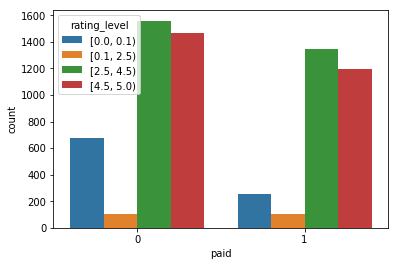

In [33]:
sns.countplot(x='paid',hue='rating_level',data=app)

In [34]:
#业务问题3：APP的大小和用户评分之间有关系吗？
q4=['user_rating','price','size_mb']

In [35]:
app[q4].corr()

,user_rating,price,size_mb
user_rating,1.000000,0.073237,0.066160
price,0.073237,1.000000,0.314386
size_mb,0.066160,0.314386,1.000000


In [58]:
#业务解答：大小价格都不和评分没有直接关系，但是价格和大小之间有正相关关系

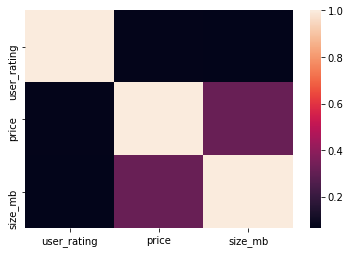

In [36]:
sns.heatmap(app[q4].corr())
#热力图，展现变量之间两两之间关系的强弱